In [1]:
import numpy as np
from matplotlib.pyplot import figure, clf, plot, xlim,ylim, imshow, subplot, title, legend,\
    xlabel, ylabel, savefig, ion
import time as ttime

# droplet lib
from skbeam.core.accumulators.droplet import dropletfind, dropletanal
# scipy libs
import scipy.ndimage.measurements as smt
# scikit image libs
import skimage.measure as skmsr

# for the progress bar
from tqdm import tqdm

%matplotlib inline
ion()

In [2]:
# image dimension
N = 1000
# dynamic range of data (max cnts)
dynrng = 1000
threshold = dynrng*.99

# number of repeats (times)
Nt = 100

#storing timings
t0_drops = np.zeros(Nt)
t1_drops = np.zeros(Nt)
t2_drops = np.zeros(Nt)
t0_scipys = np.zeros(Nt)
t1_scipys = np.zeros(Nt)
t2_scipys = np.zeros(Nt)
t3_scipys = np.zeros(Nt)
t0_skimages = np.zeros(Nt)
t1_skimages = np.zeros(Nt)
t2_skimages = np.zeros(Nt)

In [3]:
# run for droplet
for i in tqdm(range(Nt)):
    # some int values (from counting detectors etc)
    img = (np.random.random((N,N))*dynrng).astype(int)
    # the binary image for the analysis
    bimg = (img > threshold).astype(int)
    # the droplet analysis
    t0_drops[i] = ttime.time()
    npeaks, limg = dropletfind(bimg)
    t1_drops[i] = ttime.time()
    npix, xcen, ycen, adus, idlist = dropletanal(img, limg, npeaks)
    t2_drops[i] = ttime.time()

100%|██████████| 100/100 [00:02<00:00, 44.76it/s]


In [4]:
# run using scipy

for i in tqdm(range(Nt)):
    # some int values (from counting detectors etc)
    img = (np.random.random((N,N))*dynrng).astype(int)
    # the binary image for the analysis
    bimg = (img > threshold).astype(int)
    t0_scipys[i] = ttime.time()
    limg, numlabels = smt.label(bimg)
    t1_scipys[i] = ttime.time()
    coms = np.array(smt.center_of_mass(img,labels=limg,index=np.arange(2,numlabels)))
    t2_scipys[i] = ttime.time()
    ADUS = smt.sum(img, labels=limg, index=np.arange(2,numlabels))
    t3_scipys[i] = ttime.time()

100%|██████████| 100/100 [00:09<00:00, 10.51it/s]


In [27]:
# run using skimage
for i in tqdm(range(Nt)):
    # some int values (from counting detectors etc)
    img = (np.random.random((N,N))*dynrng).astype(int)
    # the binary image for the analysis
    bimg = (img > threshold).astype(int)
    t0_skimages[i] = ttime.time()
    limg, numlabels = skmsr.label(bimg,return_num=True,connectivity=1, background=0)
    t1_skimages[i] = ttime.time()
    props = skmsr.regionprops(limg,img)
    t2_skimages[i] = ttime.time()

100%|██████████| 100/100 [00:06<00:00, 16.65it/s]


In [28]:
dt01_drops = t1_drops-t0_drops
dt12_drops = t2_drops-t1_drops
dt02_drops = t2_drops-t0_drops

dt01_scipys = t1_scipys-t0_scipys
dt12_scipys = t2_scipys-t1_scipys
dt23_scipys = t3_scipys-t2_scipys
dt13_scipys = t3_scipys-t1_scipys
dt03_scipys = t3_scipys-t0_scipys

dt01_skimages = t1_skimages-t0_skimages
dt12_skimages = t2_skimages-t1_skimages
dt02_skimages = t2_skimages-t0_skimages

In [69]:
#compare them on same image
# image
threshold = .991*dynrng
img = (np.random.random((N,N))*dynrng).astype(int)
# the binary image for the analysis
bimg = (img > threshold).astype(int)


# the droplet analysis
numlabels_drop, limg_drop = dropletfind(bimg)
npix_drop, xcen_drop, ycen_drop, adus_drop, idlist_drop = dropletanal(img, limg_drop, numlabels_drop)

#scipy
limg_scipy, numlabels_scipy = smt.label(bimg)
coms_scipy = np.array(smt.center_of_mass(img,labels=limg_scipy,index=np.arange(0,numlabels_scipy)))
adus_scipy = smt.sum(img, labels=limg_scipy, index=np.arange(0,numlabels_scipy))

#skimage
limg_skimage, numlabels_skimage = skmsr.label(bimg,return_num=True,connectivity=1,background=0)
props_skimage = skmsr.regionprops(limg_skimage+1,img)

In [70]:
sk1 = props_skimage[100]

adus_skimage = [sk1.area*sk1.mean_intensity for sk1 in props_skimage]

7966
7966
7966
7966
7966
7966


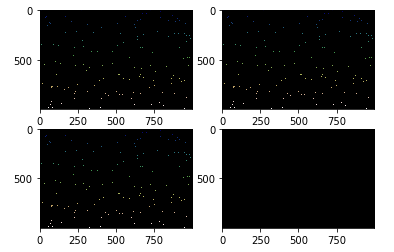

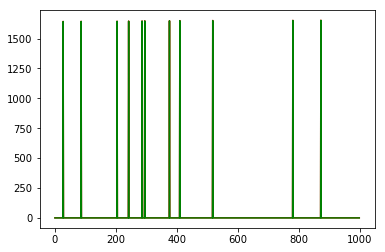

In [85]:
figure(0);clf()
subplot(2,2,1)
imshow(limg_drop);
subplot(2,2,2)
imshow(limg_scipy);
subplot(2,2,3)
imshow(limg_skimage)
subplot(2,2,4)
#scipy and skimage are equivalent
imshow(limg_scipy-limg_skimage)

print(numlabels_drop)
print(numlabels_scipy)
print(numlabels_skimage)

print(len(adus_drop))
print(len(adus_scipy))
print(len(adus_skimage))

figure(2);clf();
#plot(limg_drop[200],'k')
plot(limg_scipy[200],'r')
plot(limg_skimage[200],'g')



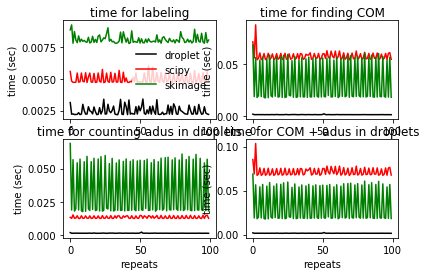

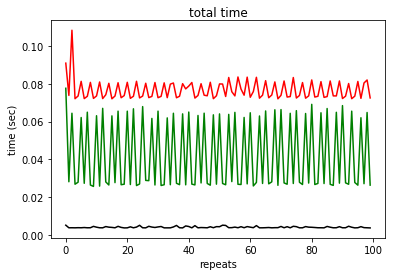

In [86]:
#print("droplet took {}s, ({}s for 1st, {}s for 2nd part".format(dt02_drop, dt01_drop, dt02_drop))
#print("scipy took {}s, ({}s for 1st, {}s for 2nd part".format(dt02_scipy, dt01_scipy, dt02_scipy))
figure(2);clf()
subplot(2,2,1);
title("time for labeling")
plot(dt01_drops,'k',label='droplet')
plot(dt01_scipys,'r',label='scipy')
plot(dt01_skimages,'g',label='skimage')
legend()
xlabel("repeats")
ylabel("time (sec)")
subplot(2,2,2);
title("time for finding COM")
plot(dt12_drops,'k')
plot(dt12_scipys,'r')
plot(dt12_skimages,'g')
xlabel("repeats")
ylabel("time (sec)")
subplot(2,2,3)
title("time for counting adus in droplets")
plot(dt12_drops,'k')
plot(dt23_scipys,'r')
plot(dt12_skimages,'g')
xlabel("repeats")
ylabel("time (sec)")
subplot(2,2,4)
title("time for COM + adus in droplets")
plot(dt12_drops,'k')
plot(dt13_scipys,'r')
plot(dt12_skimages,'g')
xlabel("repeats")
ylabel("time (sec)")

savefig("droplet-results")

figure(3);clf()
title("total time")
plot(dt02_drops,'k')
plot(dt03_scipys,'r')
plot(dt02_skimages,'g')
xlabel("repeats")
ylabel("time (sec)")
savefig("droplet-results-total")


